In [2]:
!pip install torch torchvision tqdm
import torch, os
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2
import matplotlib.pyplot as plt

In [9]:
from google.colab import files
uploaded=files.upload()

Saving %2Fmodels%2Fmodel-12.pth to %2Fmodels%2Fmodel-12 (1).pth


In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=256, kernel_size=5)#32-5+1=28
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)#14
        self.conv2 = nn.Conv2d(in_channels=256, out_channels=1024, kernel_size=3)#14-3+1=12
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)#6
        self.conv3 = nn.Conv2d(in_channels=1024, out_channels=2048, kernel_size=3)#6-3+1=4
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)#2
        self.conv4 = nn.Conv2d(in_channels=2048, out_channels=2048, kernel_size=1)#2
        self.pool4= nn.MaxPool2d(kernel_size=2, stride=2)#1
        self.fc1 = nn.Linear(in_features=2048*1*1, out_features=1024)
        self.fc2 = nn.Linear(in_features=1024, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=10)


    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        out1=x
        x = self.pool2(F.relu(self.conv2(x)))
        out2=x
        x = self.pool3(F.relu(self.conv3(x)))
        out3=x
        x = self.pool4(F.relu(self.conv4(x)))
        out4=x
        x = x.view(-1, 2048*1*1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x,out1,out2,out3,out4
net = Net()
#net=net.cuda()

In [7]:
net

Net(
  (conv1): Conv2d(3, 256, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(256, 1024, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(1024, 2048, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(2048, 2048, kernel_size=(1, 1), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [0]:
weights = torch.load('%2Fmodels%2Fmodel-12 (1).pth')


In [0]:
net.load_state_dict(weights)

In [4]:
transform = transforms.Compose(

    [transforms.ToTensor(),

     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
import torch.nn.functional as outnorm


Files already downloaded and verified


In [12]:
'''
image = cv2.imread('airplane1.png',0)
with torch.no_grad():
  var_image = torch.Tensor(image).cuda()
  output=net(var_image)
''' 
def test(testloader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in tqdm(testloader):
            images, labels = data
            #if torch.cuda.is_available():
            #    images, labels = images.cuda(), labels.cuda()        
            outputs,out1,out2,out3,out4 = net(images)
            #outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
                                    100 * correct / total))
test(testloader, net)
  



100%|██████████| 10/10 [04:20<00:00, 26.08s/it]


Accuracy of the network on the 10000 test images: 81 %


In [0]:
import numpy as np
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


In [15]:
iteration=0#1 iterations, batch size is 1000, therefore we get 1000 images to experiment on in total
for data in tqdm(testloader):
  if(iteration<1):  
    images,labels=data
    # show images
    #imshow(torchvision.utils.make_grid(images))
    # print labels
    #print('Original classes:')
    #print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
    #if torch.cuda.is_available():
    #  images, labels = images.cuda(), labels.cuda()        
    
    outputs,out1,out2,out3,out4 = net(images)
    
    
    _, predicted = torch.max(outputs.data, 1)
    print('Original class, Predicted class')
    for j in range(1000):
      labelj = int(predicted[j])
      print(classes[labels[j]],classes[labelj])
    
    
    iteration=iteration+1
  


  0%|          | 0/10 [00:00<?, ?it/s]

Original class, Predicted class
cat cat
ship ship
ship ship
plane plane
frog frog
frog frog
car car
frog frog
cat cat
car car
plane dog
truck truck
dog dog
horse horse
truck truck
ship ship
dog dog
horse horse
ship ship
frog frog
horse horse
plane bird
deer deer
truck truck
dog deer
bird cat
deer frog
plane plane
truck truck
frog frog
frog frog
dog dog
deer deer
dog dog
truck truck
bird ship
deer deer
car car
truck truck
dog dog
deer deer
frog frog
dog dog
frog frog
plane plane
truck truck
cat cat
truck horse
horse horse
frog frog
truck truck
ship ship
plane horse
cat cat
ship ship
ship ship
horse horse
horse cat
deer deer
frog frog
horse horse
cat dog
frog frog
cat bird
frog frog
bird bird
car ship
bird bird
cat cat
horse horse
bird ship
frog deer
ship ship
ship ship
plane plane
bird bird
truck bird
cat cat
cat cat
ship ship
ship ship
car car
car car
horse horse
bird bird
dog horse
bird bird
horse horse
ship ship
truck truck
plane plane
cat cat
ship ship
frog frog
deer deer
frog frog



 10%|█         | 1/10 [00:28<04:14, 28.30s/it]

frog frog
car car
dog dog
cat cat
ship ship
truck truck
dog horse
ship ship
dog dog
horse horse
plane ship
horse horse
plane plane
dog dog
plane plane
plane plane
deer deer
frog frog
truck truck
plane plane
truck truck
dog dog
frog frog
frog frog
frog frog
bird bird
truck truck
plane plane
car car
horse dog
frog frog
horse horse
dog dog
truck truck
car car
frog frog
bird bird
dog dog
dog dog
dog cat
ship ship
dog dog
truck truck
deer deer
frog frog
deer deer
cat cat
bird bird
plane plane
horse horse
frog frog
bird bird
bird bird
cat cat
truck truck
horse cat
truck truck
bird deer
frog frog
horse horse
car car
cat cat
frog frog
frog frog
ship ship
truck ship
horse horse
dog bird
deer deer
plane plane
ship ship
deer deer
plane plane
truck truck
cat cat
deer deer
ship ship
truck truck
frog frog
truck truck
bird bird
frog frog
car car
deer deer
horse horse
cat cat
dog bird
cat cat
ship ship
dog dog
plane plane
bird bird
car car
frog frog
deer deer
cat cat
cat cat
truck truck
frog frog
truc


100%|██████████| 10/10 [00:30<00:00,  3.01s/it]


In [16]:
outputs[0]

tensor([ 0.1787, -1.0354, -2.8116,  6.8347, -2.4701,  5.1752, -3.1152, -1.8136,
         2.6189, -3.8044], grad_fn=<SelectBackward>)

In [19]:
print(out1.size(),
out2.size(),
out3.size(),
out4.size())


#Chossing filter, oth filter response:
#out1: 100,200,240
#out2: 400,800,1000
#out3: 1000,2000
#out4: 1000,2000

  


torch.Size([1000, 256, 14, 14]) torch.Size([1000, 1024, 6, 6]) torch.Size([1000, 2048, 2, 2]) torch.Size([1000, 2048, 1, 1])


In [36]:
a = out1[0,100,:,:].cpu().detach().numpy()
#plt.imshow(a)
np.linalg.norm(a)

3.0004585

In [0]:
out11 = []
out12 = []
out21 = []
out22 = []
out31 = []
out32 = []
out41 = []
out42 = []
out13 = []
out23 = []

for j in range(1000):
  b=out1[j,100,:,:].detach()
  out11.append(np.linalg.norm(b))
  b=out1[j,200,:,:].detach()
  out12.append(np.linalg.norm(b))
  b=out1[j,240,:,:].detach()
  out13.append(np.linalg.norm(b))
  b=out2[j,400,:,:].detach()
  out21.append(np.linalg.norm(b))
  b=out2[j,800,:,:].detach()
  out22.append(np.linalg.norm(b))
  b=out2[j,1000,:,:].detach()
  out23.append(np.linalg.norm(b))
  b=out3[j,1000,:,:].detach()
  out31.append(np.linalg.norm(b))
  b=out3[j,2000,:,:].detach()
  out32.append(np.linalg.norm(b))
  b=out4[j,1000,:,:].detach()
  out41.append(np.linalg.norm(b))
  b=out4[j,2000,:,:].detach()
  out42.append(np.linalg.norm(b))
  
  
  
out11ind=sorted(range(len(out11)), key=lambda k: out11[k])
out11.sort()
out12ind=sorted(range(len(out12)), key=lambda k: out12[k])
out12.sort()
out13ind=sorted(range(len(out13)), key=lambda k: out13[k])
out13.sort()
out21ind=sorted(range(len(out21)), key=lambda k: out21[k])
out21.sort()
out22ind=sorted(range(len(out22)), key=lambda k: out22[k])
out22.sort()
out23ind=sorted(range(len(out23)), key=lambda k: out23[k])
out23.sort()
out31ind=sorted(range(len(out31)), key=lambda k: out31[k])
out31.sort()
out32ind=sorted(range(len(out32)), key=lambda k: out32[k])
out32.sort()
out41ind=sorted(range(len(out41)), key=lambda k: out41[k])
out41.sort()
out42ind=sorted(range(len(out42)), key=lambda k: out42[k])
out42.sort()

For all the 10 filters, top 5 of the image patches corresponding to the maximum response position in the ﬁlter map is shown, the filter response as well as the corresponding image patch is displayed.
5th Highest Response
Filter 1
Filter 2
Filter 3
Filter 4
Filter 5
Filter 6
Filter 7
Filter 8
Filter 9
Filter 10
4th Highest Response
Filter 1
Filter 2
Filter 3
Filter 4
Filter 5
Filter 6
Filter 7
Filter 8
Filter 9
Filter 10
3rd Highest Response
Filter 1
Filter 2
Filter 3
Filter 4

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



Filter 5
Filter 6
Filter 7
Filter 8
Filter 9
Filter 10
2nd Highest Response
Filter 1
Filter 2
Filter 3
Filter 4
Filter 5
Filter 6
Filter 7
Filter 8
Filter 9
Filter 10
Highest Response
Filter 1
Filter 2
Filter 3
Filter 4
Filter 5
Filter 6
Filter 7
Filter 8
Filter 9
Filter 10


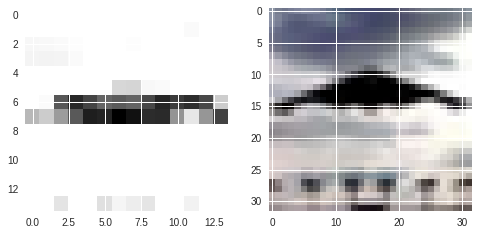

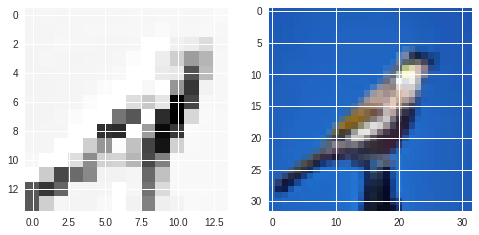

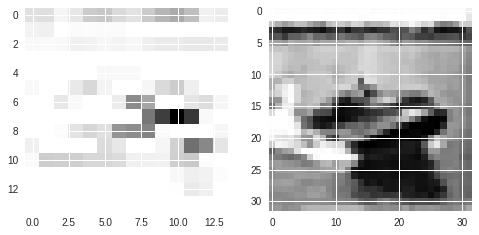

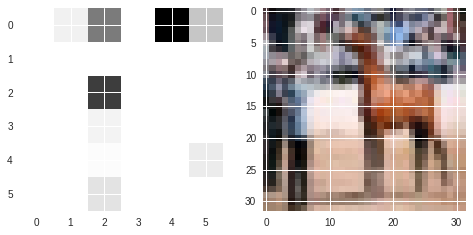

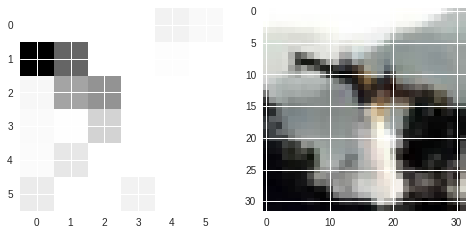

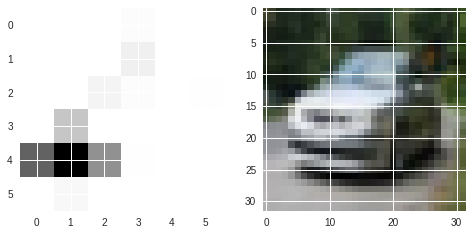

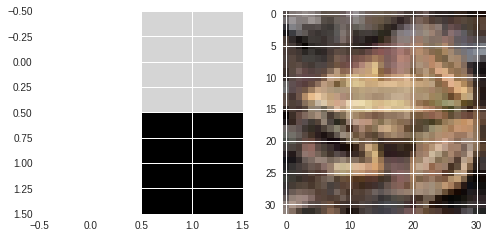

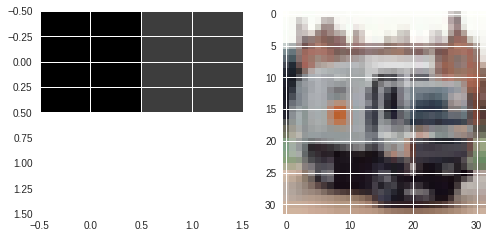

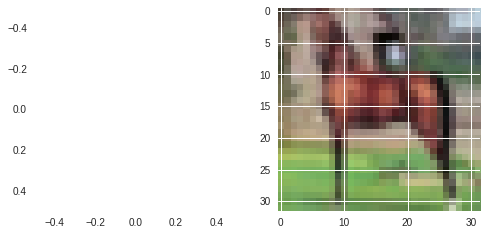

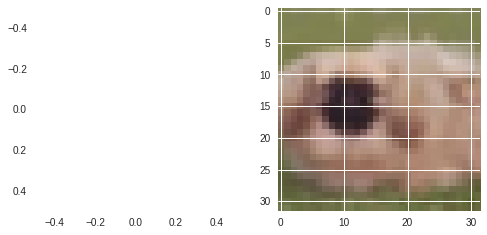

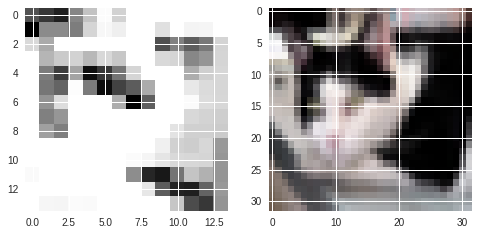

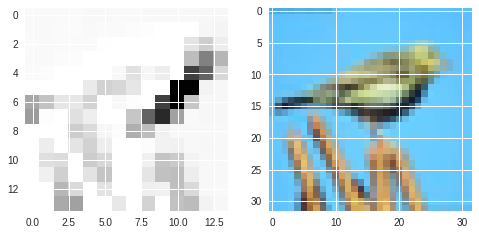

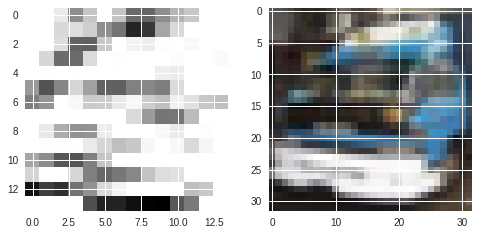

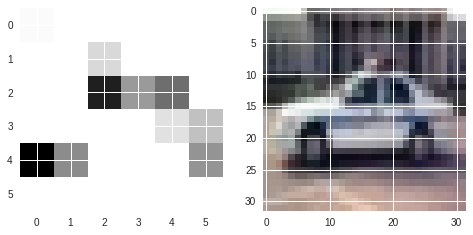

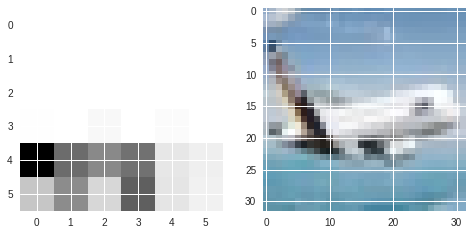

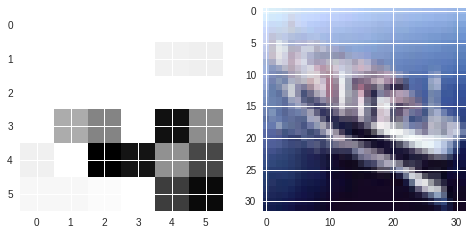

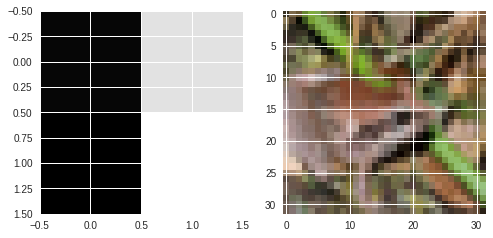

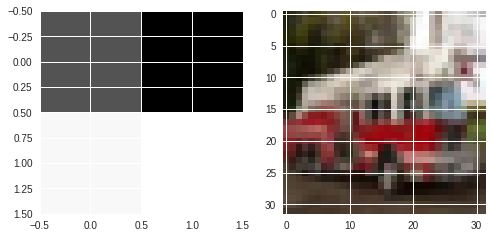

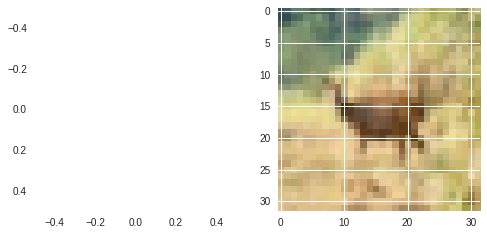

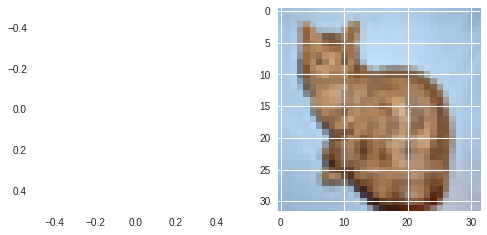

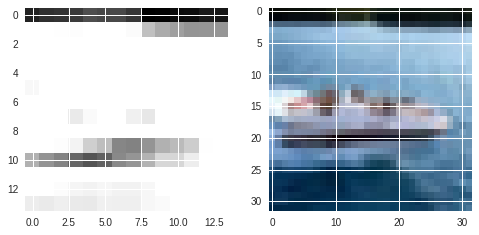

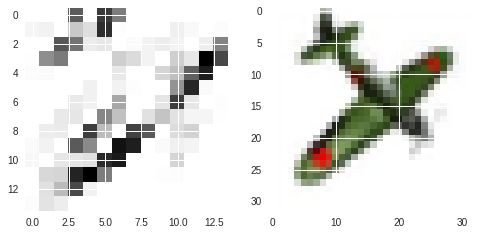

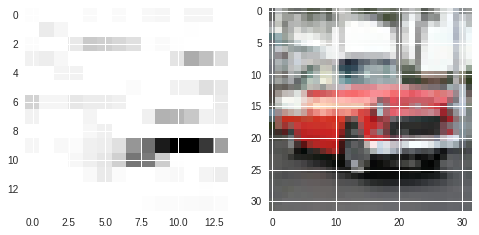

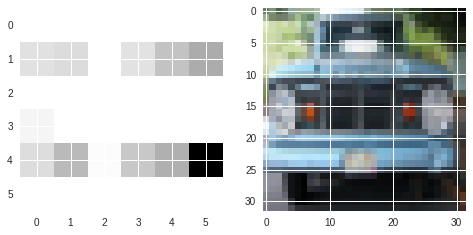

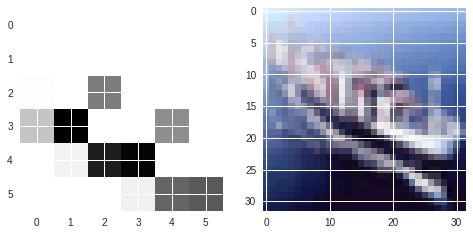

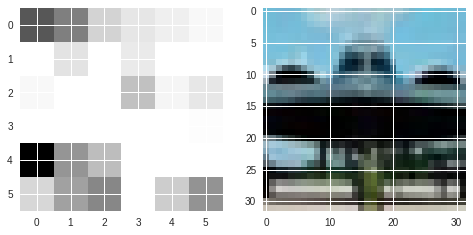

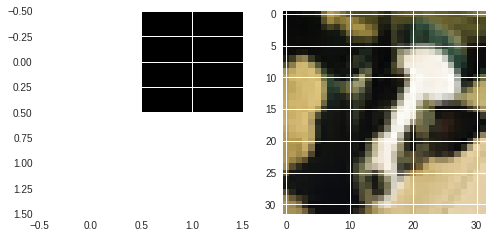

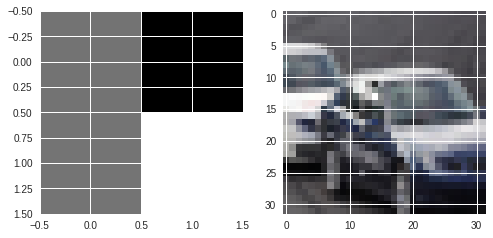

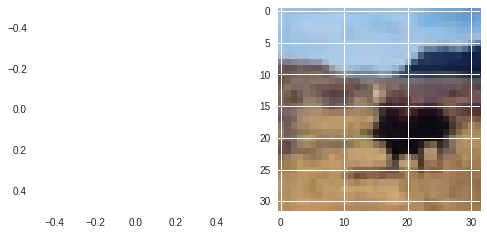

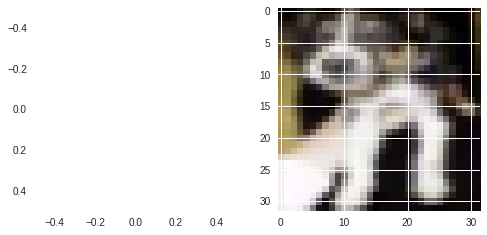

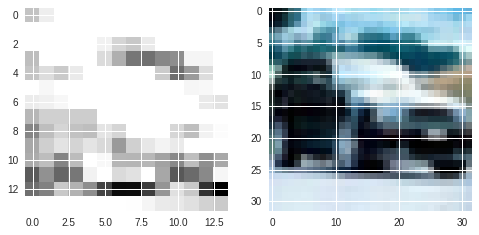

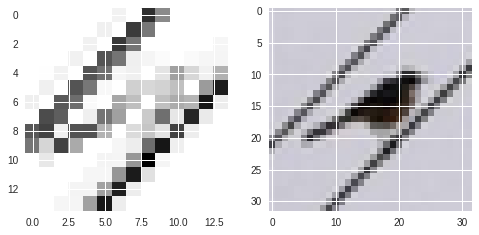

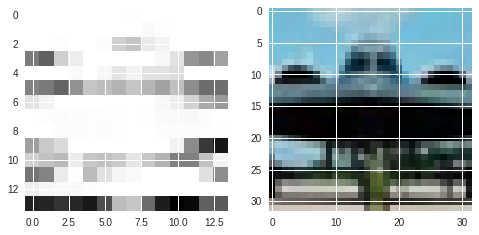

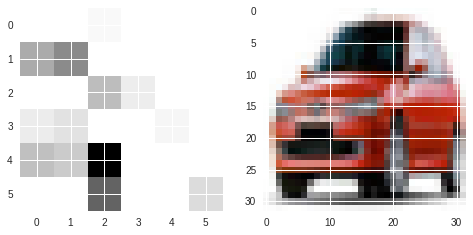

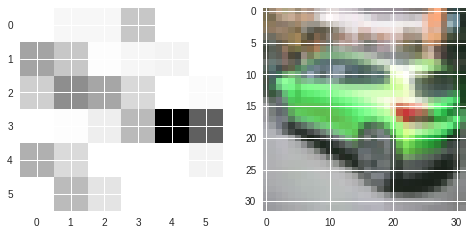

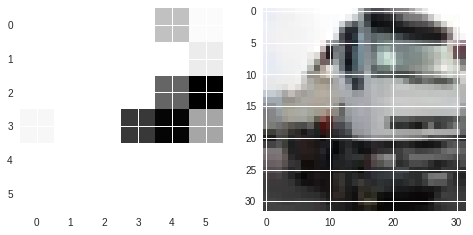

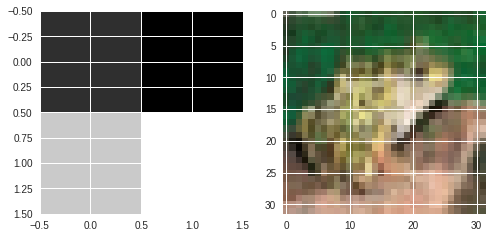

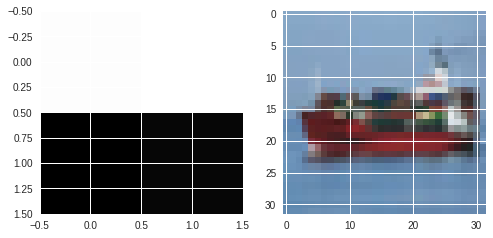

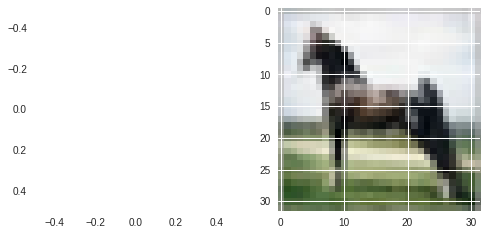

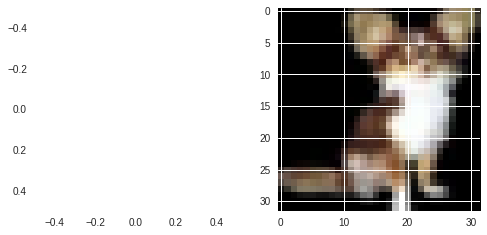

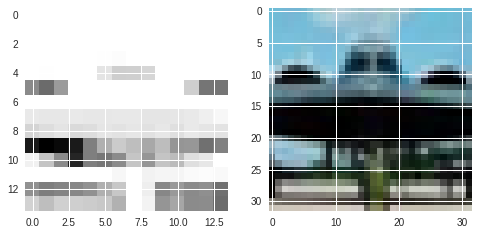

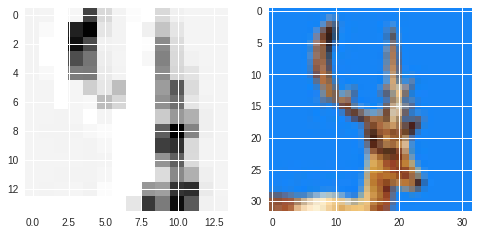

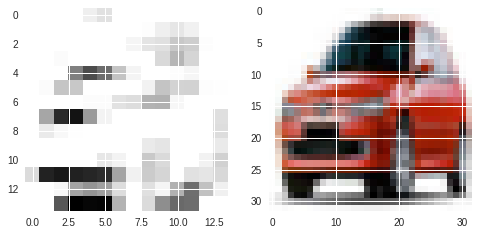

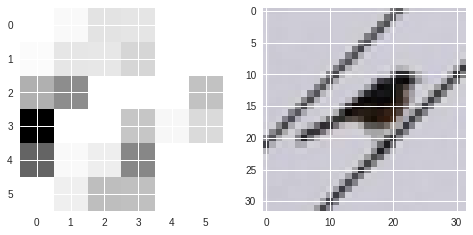

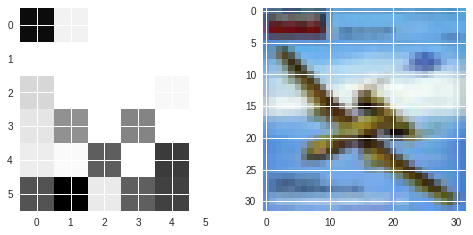

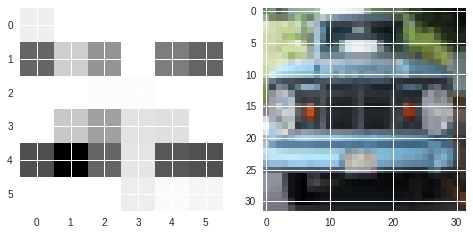

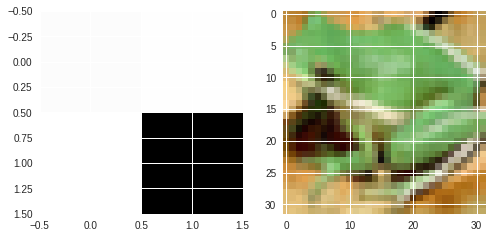

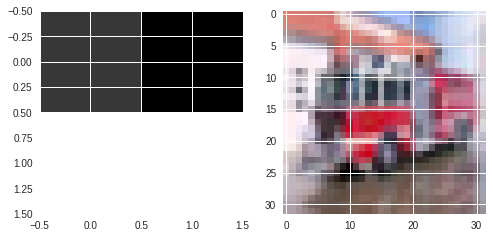

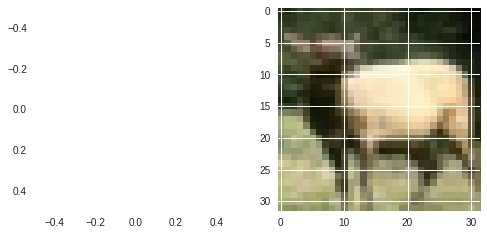

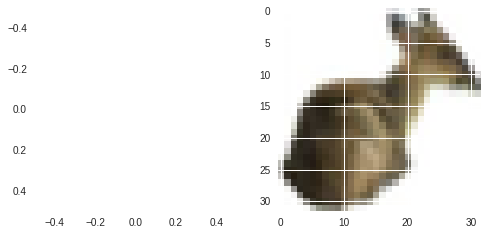

In [30]:
print("For all the 10 filters, top 5 of the image patches corresponding to the maximum response position in the ﬁlter map is shown, the filter response as well as the corresponding image patch is displayed.")
#images=images.cpu()
for j in range(995,1000):
  if(j==999):
    print("Highest Response")
  if(j==998):
    print("2nd Highest Response")
  if(j==997):
    print("3rd Highest Response")
  if(j==996):
    print("4th Highest Response")
  if(j==995):
    print("5th Highest Response")
  plt.figure()
  print("Filter 1")
  a = out1[out11ind[j],100,:,:].cpu().detach().numpy()
  plt.subplot(1,2,1)
  plt.imshow(a)
  plt.subplot(1,2,2)
  imshow(images[out11ind[j]])
  plt.figure()
  print("Filter 2")
  a = out1[out12ind[j],200,:,:].cpu().detach().numpy()
  plt.subplot(1,2,1)
  plt.imshow(a)
  plt.subplot(1,2,2)
  imshow(images[out12ind[j]])
  plt.figure()
  print("Filter 3")
  a = out1[out13ind[j],240,:,:].cpu().detach().numpy()
  plt.subplot(1,2,1)
  plt.imshow(a)
  plt.subplot(1,2,2)
  imshow(images[out13ind[j]])
  plt.figure()
  print("Filter 4")
  a = out2[out21ind[j],400,:,:].cpu().detach().numpy()
  plt.subplot(1,2,1)
  plt.imshow(a)
  plt.subplot(1,2,2)
  imshow(images[out21ind[j]])
  plt.figure()
  print("Filter 5")
  a = out2[out22ind[j],800,:,:].cpu().detach().numpy()
  plt.subplot(1,2,1)
  plt.imshow(a)
  plt.subplot(1,2,2)
  imshow(images[out22ind[j]])
  plt.figure()
  print("Filter 6")
  a = out2[out23ind[j],1000,:,:].cpu().detach().numpy()
  plt.subplot(1,2,1)
  plt.imshow(a)
  plt.subplot(1,2,2)
  imshow(images[out23ind[j]])
  plt.figure()
  print("Filter 7")
  a = out3[out31ind[j],1000,:,:].cpu().detach().numpy()
  plt.subplot(1,2,1)
  plt.imshow(a)
  plt.subplot(1,2,2)
  imshow(images[out31ind[j]])
  plt.figure()
  print("Filter 8")
  a = out3[out32ind[j],2000,:,:].cpu().detach().numpy()
  plt.subplot(1,2,1)
  plt.imshow(a)
  plt.subplot(1,2,2)
  imshow(images[out32ind[j]])
  plt.figure()
  print("Filter 9")
  a = out4[out41ind[j],1000,:,:].cpu().detach().numpy()
  plt.subplot(1,2,1)
  plt.imshow(a)
  plt.subplot(1,2,2)
  imshow(images[out41ind[j]])
  plt.figure()
  print("Filter 10")
  a = out4[out42ind[j],2000,:,:].cpu().detach().numpy()
  plt.subplot(1,2,1)
  plt.imshow(a)
  plt.subplot(1,2,2)
  imshow(images[out42ind[j]])


In [0]:
#Q2.2
net=Net()
weight = torch.load('%2Fmodels%2Fmodel-12 (1).pth')

In [6]:
weight['conv1.weight'][100,:,:,:]=0
weight['conv1.weight'][200,:,:,:]=0
weight['conv1.weight'][240,:,:,:]=0
weight['conv2.weight'][400,:,:,:]=0
weight['conv2.weight'][800,:,:,:]=0
weight['conv2.weight'][1000,:,:,:]=0
weight['conv3.weight'][1000,:,:,:]=0
weight['conv3.weight'][2000,:,:,:]=0
weight['conv4.weight'][1000,:,:,:]=0
weight['conv4.weight'][2000,:,:,:]=0
weight['conv1.bias'][:]=0
weight['conv2.bias'][:]=0
weight['conv3.bias'][:]=0
weight['conv4.bias'][:]=0
net.load_state_dict(weight)
iteration=0#1 iterations, batch size is 1000, therefore we get 1000 images to experiment on in total
for data in tqdm(testloader):
  if(iteration<1):  
    images,labels=data
    # show images
    #imshow(torchvision.utils.make_grid(images))
    # print labels
    #print('Original classes:')
    #print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
    #if torch.cuda.is_available():
    #  images, labels = images.cuda(), labels.cuda()        
    
    outputs,out1,out2,out3,out4 = net(images)
    
    
    _, predicted = torch.max(outputs.data, 1)
    print('Original class, Predicted class')
    for j in range(1000):
      labelj = int(predicted[j])
      print(classes[labels[j]],classes[labelj])
    
    
    iteration=iteration+1
  



  0%|          | 0/10 [00:00<?, ?it/s]

Original class, Predicted class
cat cat
ship car
ship car
plane plane
frog frog
frog car
car car
frog frog
cat cat
car car
plane dog
truck truck
dog cat
horse horse
truck truck
ship ship
dog dog
horse dog
ship ship
frog frog
horse dog
plane bird
deer cat
truck truck
dog cat
bird cat
deer car
plane plane
truck truck
frog frog
frog cat
dog dog
deer frog
dog cat
truck truck
bird car
deer deer
car car
truck truck
dog dog
deer deer
frog frog
dog dog
frog frog
plane bird
truck truck
cat cat
truck cat
horse horse
frog frog
truck truck
ship ship
plane horse
cat cat
ship ship
ship ship
horse dog
horse cat
deer bird
frog cat
horse horse
cat dog
frog frog
cat bird
frog frog
bird bird
car ship
bird bird
cat cat
horse horse
bird bird
frog car
ship ship
ship ship
plane plane
bird bird
truck plane
cat cat
cat cat
ship ship
ship ship
car car
car car
horse horse
bird bird
dog dog
bird bird
horse truck
ship ship
truck truck
plane car
cat bird
ship ship
frog frog
deer deer
frog dog
frog frog
plane plane


 10%|█         | 1/10 [00:29<04:28, 29.86s/it]

frog frog
bird cat
dog ship
cat cat
horse horse
cat truck
horse horse
bird bird
dog dog
cat dog
car truck
car car
deer cat
truck truck
truck truck
dog dog
horse horse
dog ship
plane plane
bird bird
bird plane
bird cat
truck truck
horse horse
cat dog
truck truck
deer deer
cat cat
dog dog
deer frog
frog ship
dog cat
frog cat
car car
deer cat
cat cat
deer deer
deer deer
cat dog
horse horse
ship ship
cat cat
horse horse
ship ship
plane plane
dog dog
horse cat
frog dog
plane car
dog dog
deer cat
ship truck
frog frog
ship ship
dog car
dog dog
truck truck
truck truck
truck truck
dog dog
plane bird
car car
plane plane
ship ship
car car
car car
ship ship
plane plane
bird dog
bird bird
plane plane
deer plane
frog frog
dog cat
deer deer
truck truck
deer deer
horse horse
truck truck
truck truck
deer frog
dog dog
frog frog
frog frog
car car
dog dog
cat dog
ship ship
truck truck
dog horse
ship ship
dog dog
horse horse
plane plane
horse horse
plane plane
dog frog
plane plane
plane plane
deer deer
fro

100%|██████████| 10/10 [00:31<00:00,  3.18s/it]


In [7]:
'''
image = cv2.imread('airplane1.png',0)
with torch.no_grad():
  var_image = torch.Tensor(image).cuda()
  output=net(var_image)
''' 
def test(testloader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in tqdm(testloader):
            images, labels = data
            #if torch.cuda.is_available():
            #    images, labels = images.cuda(), labels.cuda()        
            outputs,out1,out2,out3,out4 = net(images)
            #outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
                                    100 * correct / total))
test(testloader, net)
  


100%|██████████| 10/10 [04:33<00:00, 27.30s/it]

Accuracy of the network on the 10000 test images: 68 %
